## Perform the following operations using Python on Graduate admission dataset.

1. Check for duplicate rows and remove it
2. Plot heat map for the continuous data.
3. Check for null /Nan values and replace them with appropriate values.
4. Consider the column with highest correlation in the dataset to build linear regression model to predict chance of admit.
5. Create data subsets by making classes for Chances of admit.(e.g. Not Admitted, might get admitted, Admitted).
6. Merge two subsets
7. Sort Data using GRE, TOEFL and University rating.
8. Transposing Data
9. Melting Data to long format
10. Casting data to wide format


In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv('Admission_Predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [29]:
df.shape

(400, 9)

##  1. Check for duplicate rows and remove it


In [30]:
duplicate_rows = df.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())

# Remove duplicate rows
df = df.drop_duplicates()

Number of duplicate rows: 0


## 2. Plot heat map for the continuous data.


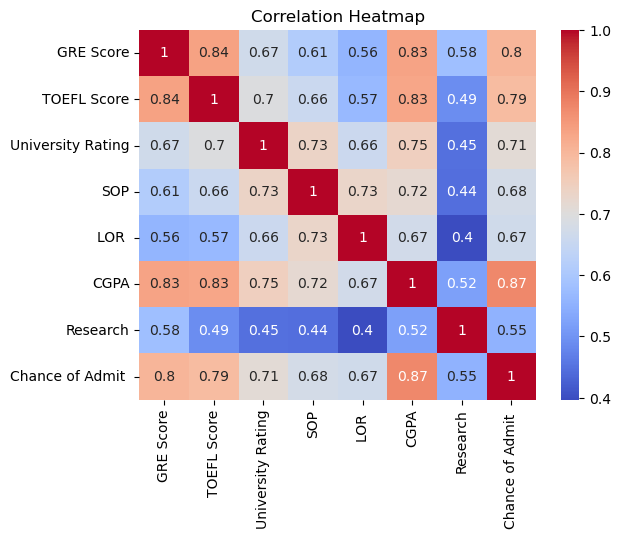

In [31]:
# Select continuous columns for the heatmap
continuous_columns = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']

# Create a correlation matrix
correlation_matrix = df[continuous_columns].corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## 3. Check for null/Nan values and replace them with appropriate values:


In [32]:
# Check for null values
null_values = df.isnull().sum()
print("Null values:\n", null_values)

# Replace null values with appropriate values (e.g., mean, median, etc.)
df = df.fillna(df.mean())

Null values:
 Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


## 4. Consider the column with the highest correlation in the dataset to build a linear regression model to predict the chance of admission:

In [33]:
from sklearn.linear_model import LinearRegression

# Select the column with the highest correlation (e.g., CGPA in this example)
feature_column = 'CGPA'

# Prepare the data for linear regression
X = df[[feature_column]]
y = df['Chance of Admit ']

# Build the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
predicted_chance_of_admit = model.predict(X)

## 5. Create data subsets by making classes for the chance of admission:



In [34]:
# Define the class intervals
class_intervals = [0, 0.5, 0.75, 1]

# Create the classes for chance of admission
df['Admission Class'] = pd.cut(df['Chance of Admit '], bins=class_intervals, labels=['Not Admitted', 'Might Get Admitted', 'Admitted'])

## 6. Merge two subsets:


In [35]:
# merged_df = pd.concat([df1, df2], axis=0)


## 7. Sort data using GRE, TOEFL, and University rating:


In [36]:
sorted_df = df.sort_values(by=['GRE Score', 'TOEFL Score', 'University Rating'])
sorted_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admission Class
377,378,290,100,1,1.5,2.0,7.56,0,0.47,Not Admitted
117,118,290,104,4,2.0,2.5,7.46,0,0.45,Not Admitted
168,169,293,97,2,2.0,4.0,7.80,1,0.64,Might Get Admitted
79,80,294,93,1,1.5,2.0,7.36,0,0.46,Not Admitted
272,273,294,95,1,1.5,1.5,7.64,0,0.49,Not Admitted


## 8. Transpose the data:


In [37]:
transposed_df = df.transpose()
transposed_df.head()

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
Serial No.,1,2,3,4,5,6,7,8,9,10,...,391,392,393,394,395,396,397,398,399,400
GRE Score,337,324,316,322,314,330,321,308,302,323,...,314,318,326,317,329,324,325,330,312,333
TOEFL Score,118,107,104,110,103,115,109,101,102,108,...,102,106,112,104,111,110,107,116,103,117
University Rating,4,4,3,3,2,5,3,2,1,3,...,2,3,4,2,4,3,3,4,3,4
SOP,4.5,4.0,3.0,3.5,2.0,4.5,3.0,3.0,2.0,3.5,...,2.0,2.0,4.0,3.0,4.5,3.5,3.0,5.0,3.5,5.0


## 9. Melting data to long format:


In [38]:
melted_df = pd.melt(df, id_vars=['Serial No.'], value_vars=['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit '], var_name='Variable', value_name='Value')
melted_df.head()

,Serial No.,Variable,Value
0,1,GRE Score,337.0
1,2,GRE Score,324.0
2,3,GRE Score,316.0
3,4,GRE Score,322.0
4,5,GRE Score,314.0


## 10. Casting data to wide format:

In [39]:
wide_df = melted_df.pivot(index='Serial No.', columns='Variable', values='Value')
wide_df.head()

Variable,CGPA,Chance of Admit,GRE Score,LOR,Research,SOP,TOEFL Score,University Rating
Serial No.,,,,,,,,
1,9.65,0.92,337.0,4.5,1.0,4.5,118.0,4.0
2,8.87,0.76,324.0,4.5,1.0,4.0,107.0,4.0
3,8.00,0.72,316.0,3.5,1.0,3.0,104.0,3.0
4,8.67,0.80,322.0,2.5,1.0,3.5,110.0,3.0
5,8.21,0.65,314.0,3.0,0.0,2.0,103.0,2.0
